<a href="https://colab.research.google.com/github/NicolasDelles1/PUC/blob/main/Ejercicio2y3_DellesNicolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte
from google.colab import drive
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters import median
from skimage.filters import rank
drive.mount('/content/drive')

Mounted at /content/drive


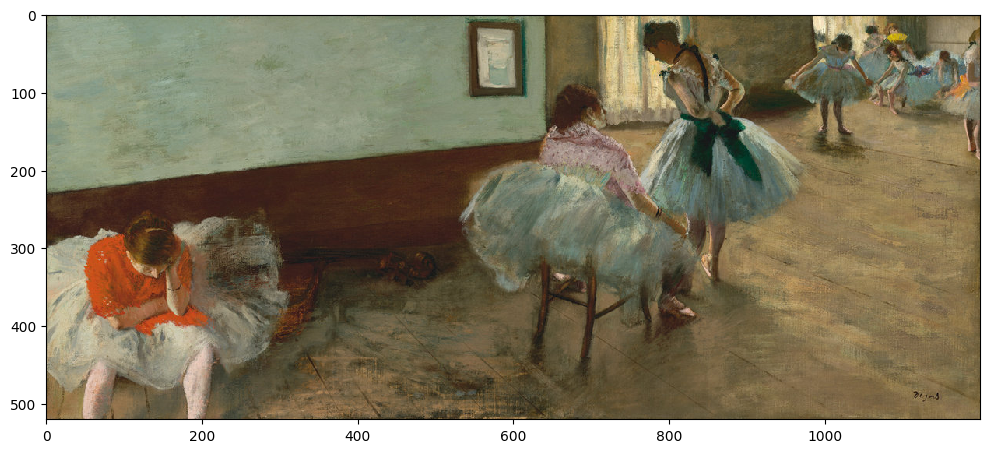

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
file_path = '/content/drive/MyDrive/EEIGM_course-main/Image processing/degas.jpg'
I1 = sk.io.imread(file_path) # read image using imread function
I1.shape

fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()


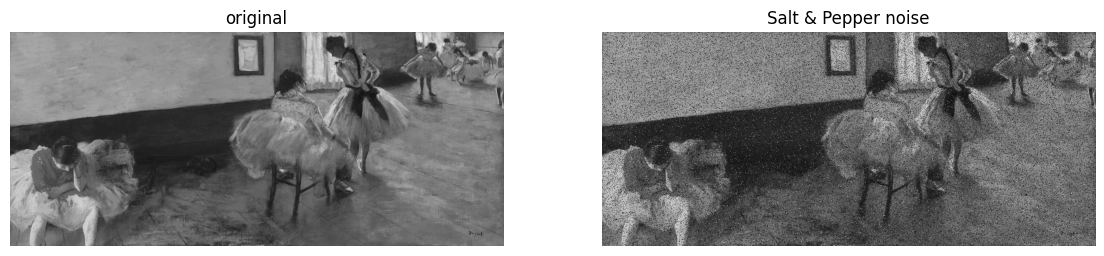

In [ ]:
IG = sk.color.rgb2gray(I1)
img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(img)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.1] = 0

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

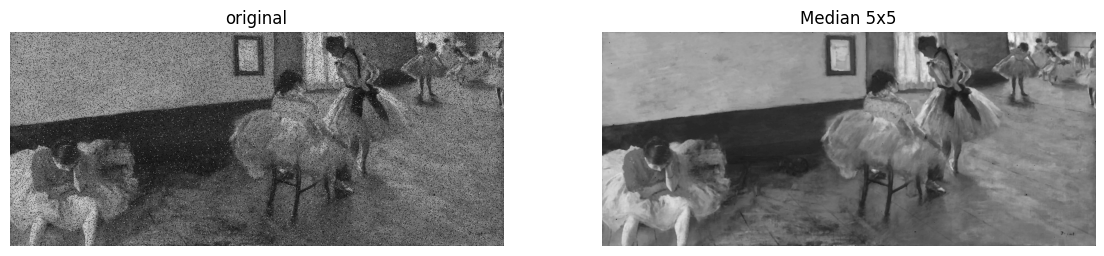

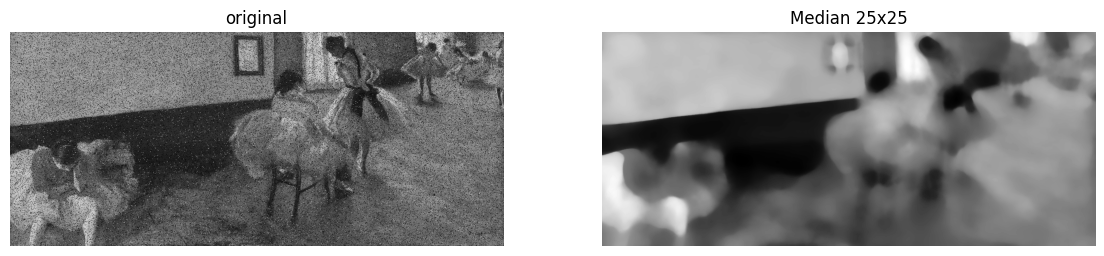

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

img_salt = img_as_ubyte(noisy_image) #fonction gaussienne qui localise les max et min et les enlève
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img_salt, sel5)
plot_comparison(img_salt,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img_salt, sel25)
plot_comparison(img_salt,img_med25x25,'Median 25x25')

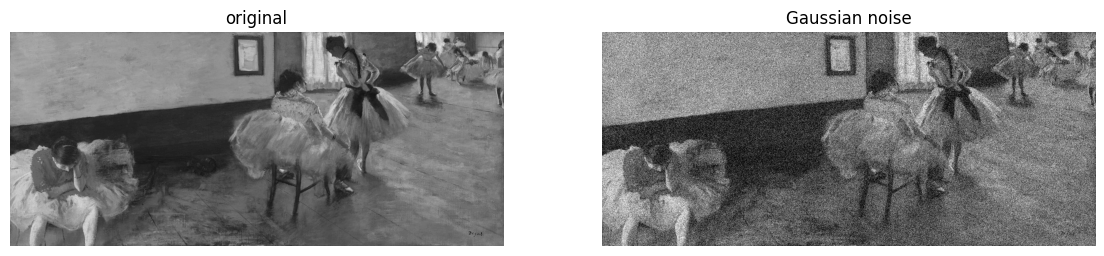

In [ ]:
import matplotlib.pyplot as plt #1 limpiar soit mettre du contraste ( éclaircir les pixels sombres et assombrir les pixels calirs) 2 aplicar filtro
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise
IG = img_as_float(IG)
sigma = 0.15
noisy_image_grey = random_noise(IG, var=sigma**2)

plot_comparison(img,noisy_image_grey,'Gaussian noise')

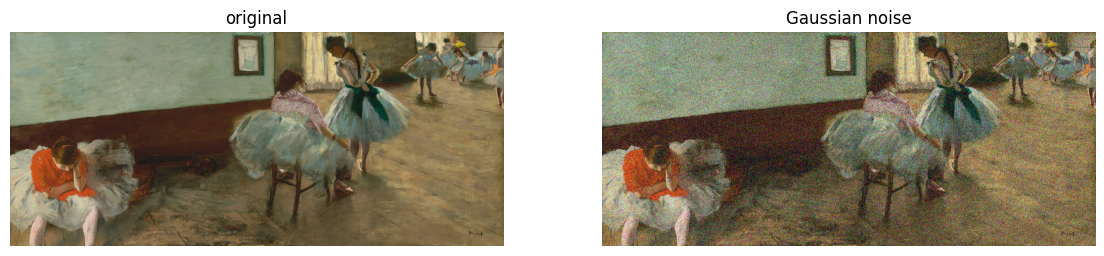

In [ ]:
import matplotlib.pyplot as plt #1 limpiar soit mettre du contraste ( éclaircir les pixels sombres et assombrir les pixels calirs) 2 aplicar filtro
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise
I1 = img_as_float(I1)
sigma = 0.15
noisy_image_normal = random_noise(I1, var=sigma**2)

plot_comparison(I1,noisy_image_normal,'Gaussian noise')

uint8
0 255


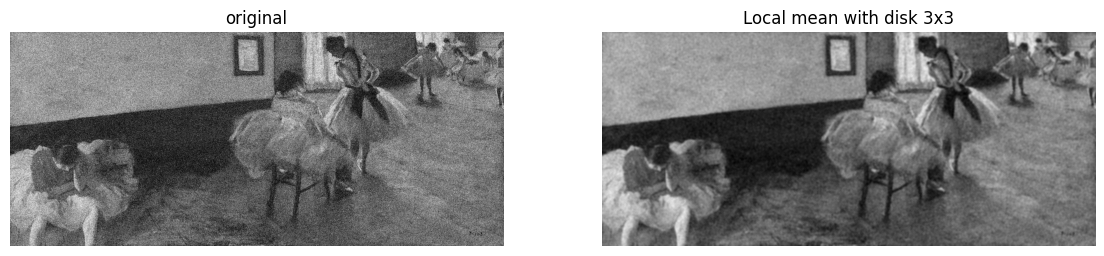

In [ ]:
img = img_as_ubyte(rgb2gray(noisy_image_normal))

# Verificar el formato de la imagen
print(img.dtype)  # Debería ser uint8
print(img.min(), img.max())  # Deberían estar entre 0 y 255


footprint = disk(3) # structuring element
img_locmed = rank.mean(img, footprint=footprint)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

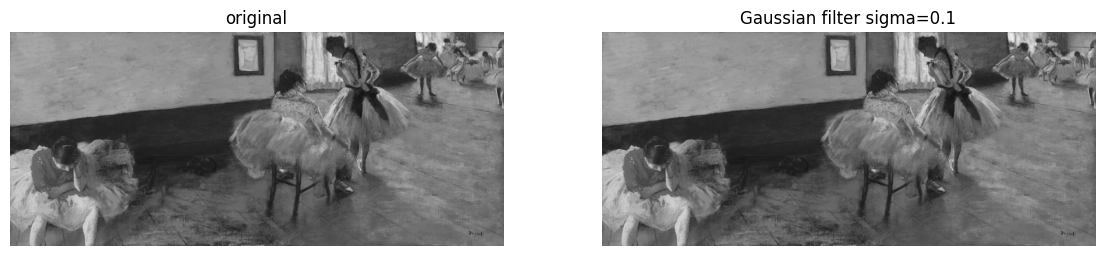

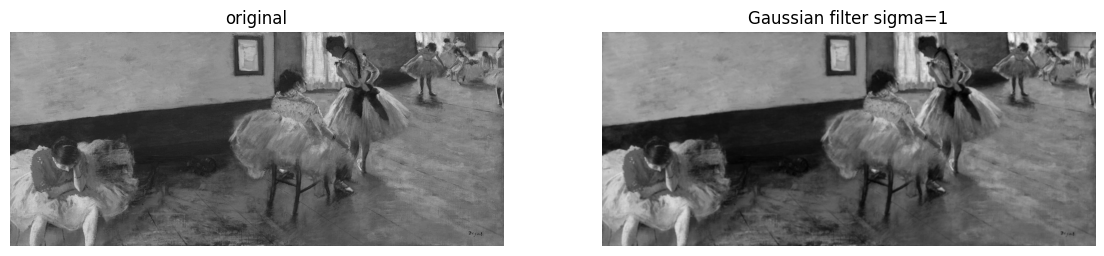

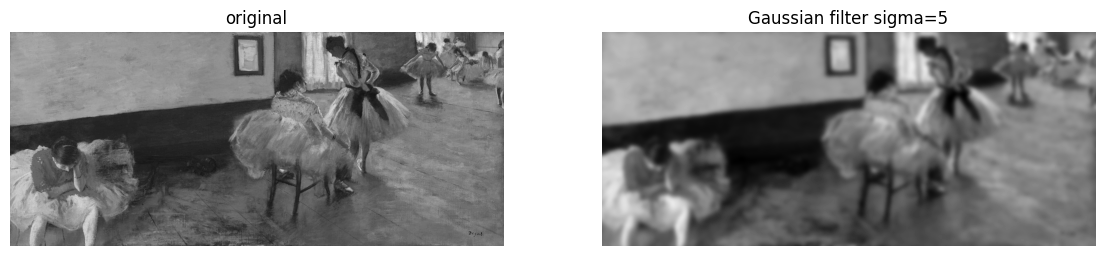

In [ ]:
from skimage import data
from skimage.filters import gaussian
from skimage.color import rgb2gray

img = IG


img_f = gaussian(img, sigma=0.1)
plot_comparison(img,img_f, 'Gaussian filter sigma=0.1')
plt.savefig('gaussian.png')


img_f = gaussian(img, sigma=1)
plot_comparison(img,img_f, 'Gaussian filter sigma=1')


img_f = gaussian(img, sigma=5)
plot_comparison(img,img_f, 'Gaussian filter sigma=5')

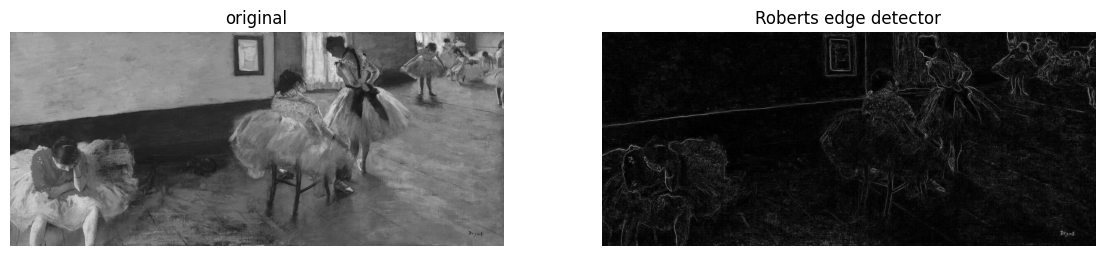

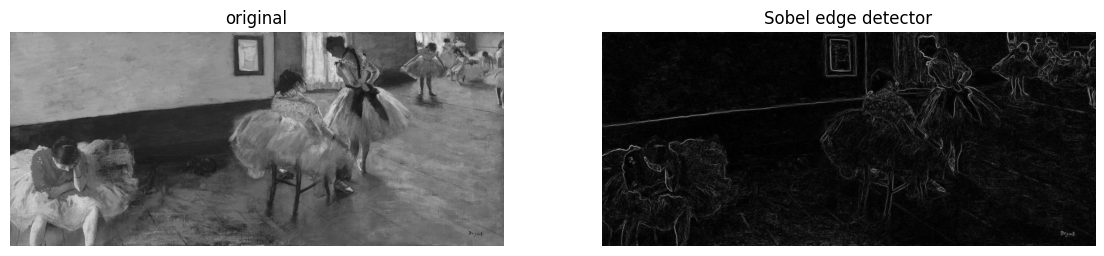

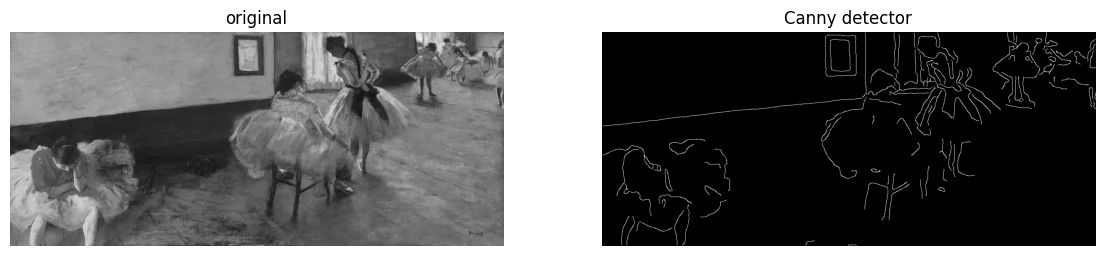

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

from skimage.data import camera
from skimage.filters import roberts, sobel

image = IG
edge_roberts = roberts(image) #fonction pour avoir les contours
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

edge_sobel = sobel(image) #fonction pour avoir les contours
plot_comparison(image,edge_sobel, 'Sobel edge detector')

edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)
plot_comparison(image,edges2, 'Canny detector')

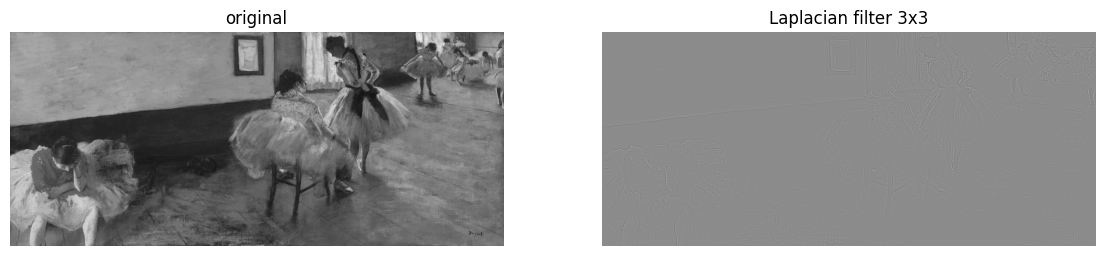

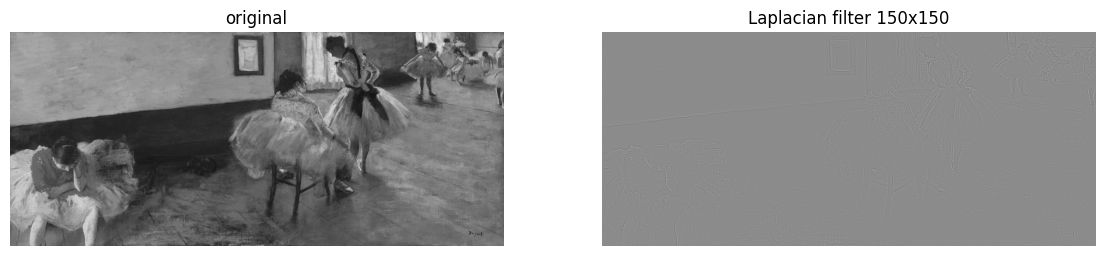

In [ ]:
from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

IG = laplace(image, 3)
plot_comparison(image,IG, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')

img_f = laplace(image, 150)
plot_comparison(image,IG, 'Laplacian filter 150x150')

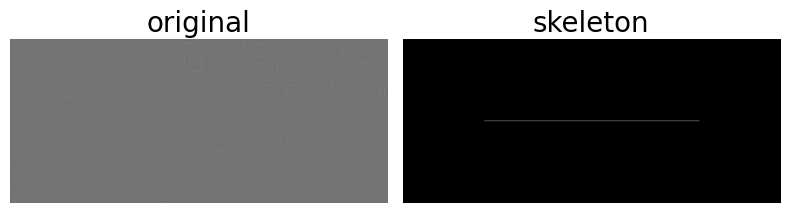

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(IG)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

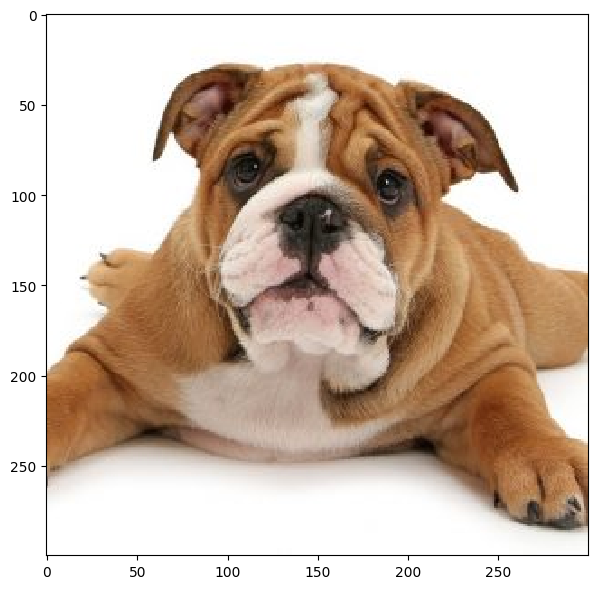

In [ ]:
file_path = '/content/drive/MyDrive/EEIGM_course-main/Image processing/dog_image.jpg'
I = sk.io.imread(file_path)
I.shape #3 = couleur
#visualizacion de la imagen 1
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

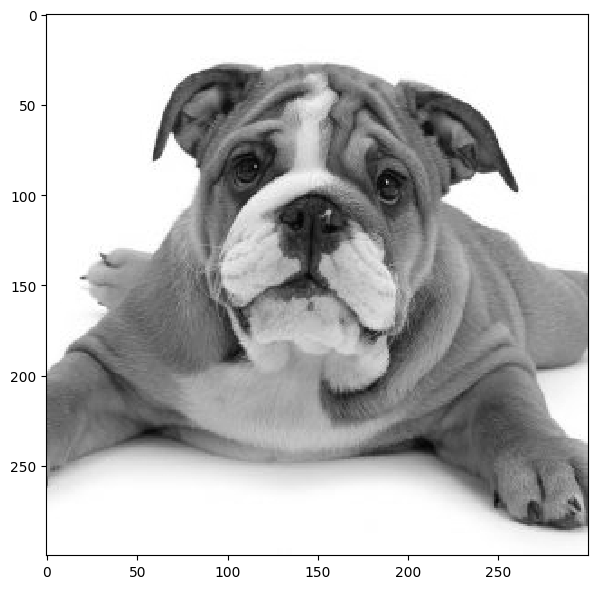

In [ ]:
IG = sk.color.rgb2gray(I)
IG.shape
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

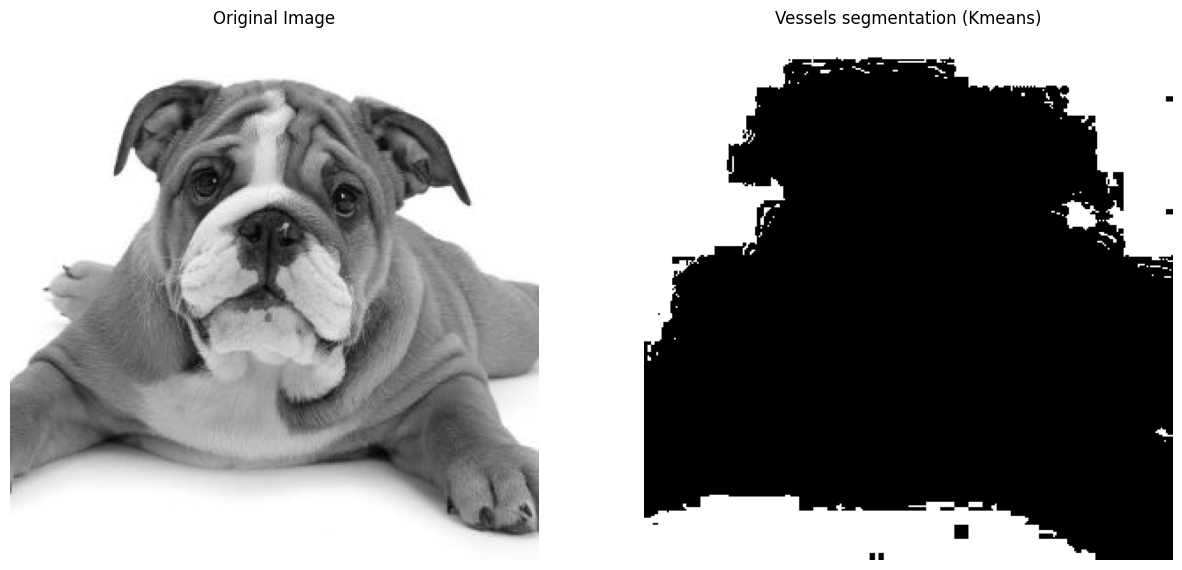

In [7]:
from sklearn.cluster import KMeans
from matplotlib import gridspec
# reshape training image as 1d array:
v_I_train = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(np.uint8)

# Fit a Kmeans clustering model with two clusters using image:
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_train)

# Apply to predict test image:
v_I_test = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(IG.shape[0],IG.shape[1]).astype(np.uint8) # Shape back result as image

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show() #El resultado no es muy bueno. Solo se puede distinguir una forma

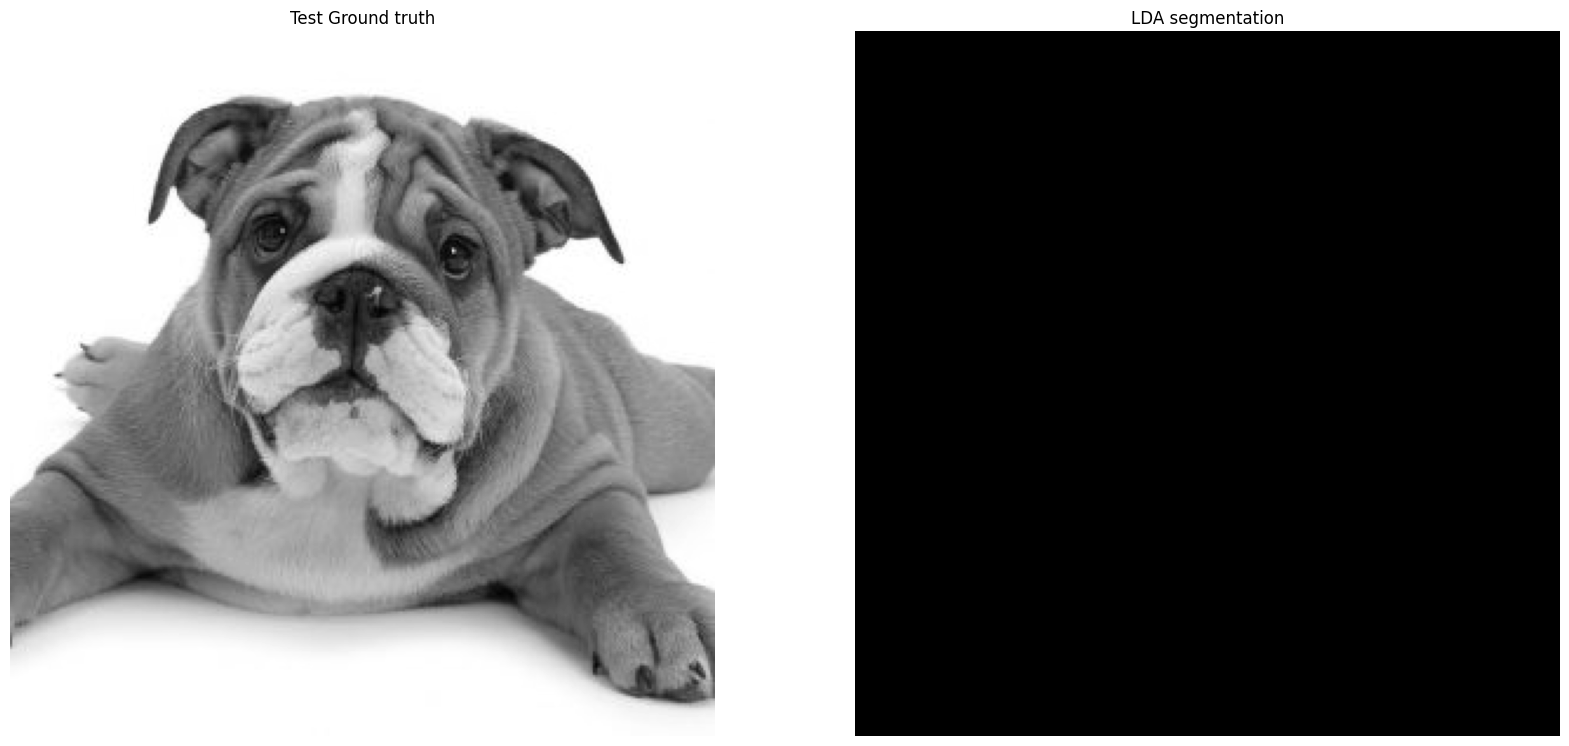

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
v_train_GT = IG.reshape(IG.shape[0]*IG.shape[1],1).astype(bool)

lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_train_GT.ravel()) # Train with training image and training Ground Truth

# Predict the test image:
v_lda = lda_model.predict(v_I_train)
I_lda = np.array(v_lda).reshape(IG.shape[0],IG.shape[1]).astype(np.uint8) # Shape back result as image

fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(IG, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_lda, cmap=plt.cm.gray)
ax[1].set_title('LDA segmentation')
ax[1].set_axis_off()

plt.show() #No entiendo el resultado